In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset 
df=pd.read_csv(r'car_evaluation.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maintenance   1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   luggage_boot  1728 non-null   object
 5   safety        1728 non-null   object
 6   decision      1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
for i in df.columns:
    print(f"----------{i}---------")
    print(df[i].value_counts())

----------buying---------
buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
----------maintenance---------
maintenance
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
----------doors---------
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
----------persons---------
persons
2       576
4       576
more    576
Name: count, dtype: int64
----------luggage_boot---------
luggage_boot
small    576
med      576
big      576
Name: count, dtype: int64
----------safety---------
safety
low     576
med     576
high    576
Name: count, dtype: int64
----------decision---------
decision
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [5]:
##making the features and predictor dataframes
X = df.drop(['decision'], axis=1)

y = df['decision']

In [6]:
X.head(10)

,buying,maintenance,doors,persons,luggage_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high
6,vhigh,vhigh,2,2,big,low
7,vhigh,vhigh,2,2,big,med
8,vhigh,vhigh,2,2,big,high
9,vhigh,vhigh,2,4,small,low


In [48]:
y.value_counts()

decision
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [8]:
## Feature engineering 

In [9]:
from sklearn.preprocessing import OrdinalEncoder
# Ordinal Encoding using scikit-learn
encoder = OrdinalEncoder(categories=[['low', 'med', 'high','vhigh']])  # Specify the order
X['buying_encoded'] = encoder.fit_transform(X[['buying']])
X['maintenance_encoded'] = encoder.fit_transform(X[['maintenance']])

In [10]:
doors_encoder = OrdinalEncoder(categories=[['2', '3', '4','5more']])  # Specify the order
X['doors_encoded'] = doors_encoder.fit_transform(X[['doors']])

In [11]:
persons_encoder = OrdinalEncoder(categories=[['2', '4','more']])  # Specify the order
X['persons_encoded'] = persons_encoder.fit_transform(X[['persons']])

In [12]:
lug_boot_encoder = OrdinalEncoder(categories=[['small', 'med','big']])  # Specify the order
X['lug_boot_encoded'] = lug_boot_encoder.fit_transform(X[['luggage_boot']])

In [13]:
safety_encoder = OrdinalEncoder(categories=[['low', 'med','high']])  # Specify the order
X['safety_encoded'] = safety_encoder.fit_transform(X[['safety']])

In [14]:
X_new=X[['buying_encoded','maintenance_encoded','persons_encoded','doors_encoded','lug_boot_encoded','safety_encoded']]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.50, random_state = 42)

In [35]:
X_train.shape, X_test.shape

((864, 6), (864, 6))

In [36]:
## using decision tree classifier in scikit learn

from sklearn.tree import DecisionTreeClassifier

In [37]:
# instantiate the DecisionTreeClassifier model with criterion as gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [38]:
y_pred_gini = clf_gini.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7998


In [40]:
y_pred_train_gini = clf_gini.predict(X_train)

array(['unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',

In [41]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7836


In [42]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7836
Test set score: 0.7998


In [43]:
## using graphviz for visualizing the tree

In [57]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 585.5 kB/s eta 0:00:00


In [24]:
import sys

for p in sys.path:
    print(p)

C:\Users\user\Downloads\Modeling
C:\ProgramData\anaconda3\python312.zip
C:\ProgramData\anaconda3\DLLs
C:\ProgramData\anaconda3\Lib
C:\ProgramData\anaconda3

C:\Users\user\AppData\Roaming\Python\Python312\site-packages
C:\ProgramData\anaconda3\Lib\site-packages
C:\ProgramData\anaconda3\Lib\site-packages\win32
C:\ProgramData\anaconda3\Lib\site-packages\win32\lib
C:\ProgramData\anaconda3\Lib\site-packages\Pythonwin


In [44]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/user/Downloads/windows_10_cmake_Release_Graphviz-12.2.1-win64/Graphviz-12.2.1-win64/bin/'

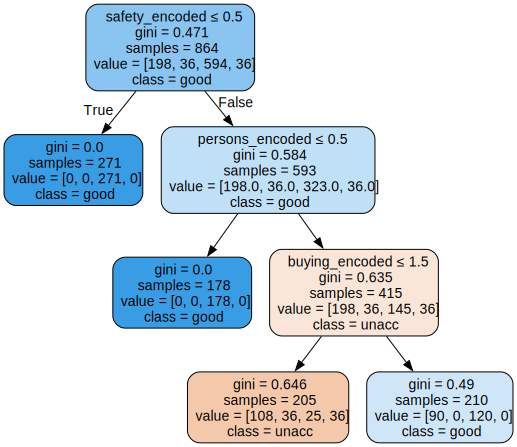

In [45]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [49]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 96   0  90   0]
 [ 33   0   0   0]
 [ 21   0 595   0]
 [ 29   0   0   0]]


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.54      0.52      0.53       186
        good       0.00      0.00      0.00        33
       unacc       0.87      0.97      0.91       616
       vgood       0.00      0.00      0.00        29

    accuracy                           0.80       864
   macro avg       0.35      0.37      0.36       864
weighted avg       0.73      0.80      0.77       864



In [52]:
#### Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Create a Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5,min_samples_leaf=5,max_features=1,bootstrap=True, criterion='gini' )

# Train the model on the training data
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=1, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [56]:
y_pred_rf_gini = rf_clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf_gini)))

Model accuracy score with criterion gini index: 0.9201


In [58]:
y_pred_rf_gini_train = rf_clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_rf_gini_train)))

Training-set accuracy score: 0.9525


In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[151   2  33   0]
 [ 21  11   0   1]
 [  2   0 614   0]
 [ 10   0   0  19]]


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_gini))

              precision    recall  f1-score   support

         acc       0.82      0.81      0.82       186
        good       0.85      0.33      0.48        33
       unacc       0.95      1.00      0.97       616
       vgood       0.95      0.66      0.78        29

    accuracy                           0.92       864
   macro avg       0.89      0.70      0.76       864
weighted avg       0.92      0.92      0.91       864

